<h1 style="text-align: center;">Forest Fire Detection using Computer Vision</h1>


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![forest%20fire%20cover%20image.png](attachment:forest%20fire%20cover%20image.png)

## 1. Problem Statement

Imagine you are in charge of watching a big forest. You want to keep everyone safe, but sometimes wildfires can start without warning. These fires can spread quickly and cause a lot of damage. So, we want to build a computer program that can look at pictures of forests and tell us if there’s a fire starting or not. This program can help people react faster to stop wildfires!

## 2. Objectives

This project will:

    Teach the computer to recognize pictures with wildfires and without wildfires.
    Build a model (a smart program) that looks at forest pictures and decides if there’s a fire.
    Show us a simple screen (a GUI) where we can upload forest pictures and get quick answers on fire danger.
    Help keep forests and people safe by giving early warnings about fires.

### 3. Dataset Information

To teach the computer about wildfires, we’ll use a special set of pictures called a dataset. This dataset has pictures of forests divided into two types: with a fire (wildfire) and without a fire (no wildfire). These images help the computer learn to tell the difference.

    Where to Get the Dataset: You can download the dataset from Kaggle
    https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset
    Dataset Folders:
        Inside, there are three main folders: train, test, and valid.
        Each folder has two subfolders:
            Wildfire: Contains pictures showing wildfires in forests.
            NoWildfire: Contains pictures showing forests without any fire.

## 4. Understanding the CNN Model

CNN stands for Convolutional Neural Network. It’s a special type of program that can look at pictures and learn to find important details. Imagine how you look at a picture and notice trees, animals, or fire — CNN does something similar!

Here’s how it works, step-by-step:

    Looking at Patterns: The CNN looks at lots of tiny patterns in pictures, like shapes and colors.
    Learning from Examples: It looks at many images of wildfires and no wildfires to learn what makes them different.
    Making Predictions: Once trained, the CNN can look at a new picture and guess if it shows a fire or not.

## 5. Code Implementation

### Step 1: Importing Libraries

We’ll use Python with TensorFlow/Keras for the CNN model and Tkinter for the GUI. Make sure you have these libraries installed.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data augumentation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tkinter as tk
from tkinter import filedialog #provides a dialog box to select files.
from PIL import Image, ImageTk #ImageTk - Converts images for display in Tkinter GUIs
import numpy as np

### Step 2: Loading and Preprocessing the Data

We'll use ImageDataGenerator to load images from your dataset's train, valid, and test folders. This will resize and normalize images so our model can use them.

In [5]:
# Set up directories
train_dir = r"/content/drive/MyDrive/KaggleDatasets/wildfire/train"
valid_dir = r"/content/drive/MyDrive/KaggleDatasets/wildfire/valid"
test_dir = r"/content/drive/MyDrive/KaggleDatasets/wildfire/test"

# Set up ImageDataGenerators for loading images
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='binary')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(64, 64), batch_size=32, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, class_mode='binary')


Found 30250 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.


### Step 3: Building the CNN Model

The CNN model will have multiple convolutional layers to extract features, followed by dense layers for classification.
- Sequential: When you need a simple feed-forward model with a single input and output.
- Functional: When your model has multiple inputs/outputs or non-linear architectures.
- Subclassing: When custom forward logic is required or your model's architecture cannot be easily represented using pre-defined layers.

In [6]:
# Building a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: wildfire or no wildfire
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We noticed some images in our dataset are incomplete or corrupted, causing TensorFlow to fail when trying to load them.
Here are a few steps to handle this issue:

Solution: Skip Corrupted Images

One way to handle this is to modify the data loading process to skip over corrupted images.

    Re-import the PIL library with a setting that will ignore truncated images.

    We add this line at the beginning of your script.

In [7]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Step 4: Training the Model

Train the model with the train and valid data.

In [8]:
# Train the model
history = model.fit(train_generator, validation_data=valid_generator, epochs=2, verbose=1)

Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  8/946 ━━━━━━━━━━━━━━━━━━━━ 3:25:16 13s/step - accuracy: 0.4799 - loss: 0.7082

KeyboardInterrupt: 

In [ ]:
#save the model
model.save("ffd_model.h5")

### Step 5: Building the GUI with Tkinter

Now, let’s create a GUI that lets us upload an image and predict if there’s a wildfire.

In [10]:
import tkinter as tk
from tkinter import filedialog

from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import load_model

In [11]:
# Load the model
model = load_model("/content/drive/MyDrive/Colab Notebooks/Green AI/ffd_model.h5")
print("Model loaded successfully!")

Model loaded successfully!


Please upload an image for prediction:


Saving -62.59065,51.16847.jpg to -62.59065,51.16847.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


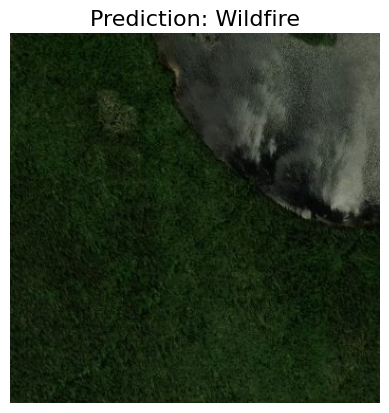

In [12]:
import numpy as np
from PIL import Image
import io
from tensorflow.keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt

# Load your trained model (provide the correct path to your model file)
# Replace "your_model_path.h5" with the actual path to your model


# Function to preprocess and predict an image
def predict_image(uploaded_file):
    # Open the uploaded image
    img = Image.open(io.BytesIO(uploaded_file)).resize((64, 64))
    img_array = np.array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict using the model
    prediction = model.predict(img_array)[0][0]  # Get scalar prediction
    result = "Wildfire" if prediction > 0.5 else "No Wildfire"

    # Display the image and prediction
    plt.imshow(np.array(Image.open(io.BytesIO(uploaded_file))))
    plt.axis('off')
    plt.title(f"Prediction: {result}", fontsize=16)
    plt.show()

# Upload an image using Colab's file upload widget
print("Please upload an image for prediction:")
uploaded = files.upload()  # Allows user to upload an image

if uploaded:
    # Process the first uploaded file
    file_name = next(iter(uploaded.keys()))
    predict_image(uploaded[file_name])


### Step 6: Testing the Model

You can now use the GUI to test the model. Click "Upload Image," select an image, and the GUI will display the image and predict if it shows a wildfire or not.

## 5. Conclusion

With this project, we have created a simple computer program that helps spot wildfires early by looking at pictures of forests. This project shows how computer vision, a field that teaches computers to see and understand images, can help us make safer decisions for people and nature. Using CNN, we taught the computer to recognize fires, giving us a way to respond faster and prevent fires from spreading.

![forest%20fire%20image.png](attachment:forest%20fire%20image.png)